### EDA: Trực quan hóa và phân phối điểm theo môn, tổ hợp và năm

In [21]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

In [22]:
import sys
import os

# 1. Lấy đường dẫn của thư mục 'Notebook'
current_dir = os.getcwd() 

# 2. Lấy đường dẫn của thư mục Project_Root (Thư mục cha của 'Notebook' và 'Module')
# Đây là thư mục Project_Root/
project_root_dir = os.path.dirname(current_dir)

# 3. Thêm Project_Root vào sys.path
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)
    
print(f"Đã thêm đường dẫn gốc: {project_root_dir}")

# Lệnh import này sẽ hoạt động sau khi thêm Project_Root vào sys.path
from Module.Load_Data import DataLoader
from Module.Processor_Data import DataProcessor
from Module.Analysis import Analysis

Đã thêm đường dẫn gốc: c:\Users\Admin\OneDrive\Máy tính\Code\Project Python for Data\PythonProject


In [51]:
proc = DataProcessor()

# Gọi pipeline xử lý rồi lấy dữ liệu
proc.process_all()
df = proc.get_processed_data()
    
# Phân tích dữ liệu
analysis = Analysis(proc)
Toan = analysis.get_arregate_by_exam_subsections(subject="toan")

In [60]:
for num in (2023, 2024, 2025):
    print(f"Số lượng học sinh thi môn toán năm học {num}: {df[df['nam_hoc'] == num]['toan'].count()}")

Số lượng học sinh thi môn toán năm học 2023: 1003373
Số lượng học sinh thi môn toán năm học 2024: 1045613
Số lượng học sinh thi môn toán năm học 2025: 1137417


In [25]:
# Set Pivot Table để dễ nhìn
Toan_23 = Toan[Toan["nam_hoc"].isin([2023])].pivot_table(
    index="nam_hoc",
    columns="diem",
    values="so_hoc_sinh",
    fill_value=0,
).squeeze()
    
Toan_24 = Toan[Toan["nam_hoc"].isin([2024])].pivot_table(
    index="nam_hoc",
    columns="diem",
    values="so_hoc_sinh",
    fill_value=0,
).squeeze()
    
Toan_25 = Toan[Toan["nam_hoc"] == 2025].pivot_table(
    index="nam_hoc",
    columns="diem",
    values="so_hoc_sinh",
    fill_value=0,
).squeeze()
    

In [ ]:
print(Toan_23)


diem
0.0         2.0
0.2         1.0
0.4         2.0
0.6         4.0
0.8        32.0
1.0        82.0
1.2       248.0
1.4       539.0
1.6      1055.0
1.8      1928.0
2.0      3084.0
2.2      4498.0
2.4      6266.0
2.6      8310.0
2.8     10049.0
3.0     11499.0
3.2     13224.0
3.4     14581.0
3.6     15839.0
3.8     17023.0
4.0     18705.0
4.2     20121.0
4.4     21769.0
4.6     23146.0
4.8     25087.0
5.0     26667.0
5.2     28490.0
5.4     30648.0
5.6     32351.0
5.8     34652.0
6.0     37100.0
6.2     39299.0
6.4     41586.0
6.6     44705.0
6.8     47231.0
7.0     51245.0
7.2     54069.0
7.4     56130.0
7.6     56640.0
7.8     53308.0
8.0     47380.0
8.2     37744.0
8.4     27537.0
8.6     18534.0
8.8     10923.0
9.0      5850.0
9.2      2672.0
9.4      1080.0
9.6       337.0
9.8        89.0
10.0       12.0
Name: 2023, dtype: float64
diem
0.0        1.0
0.4        1.0
0.6        5.0
0.8       12.0
1.0       43.0
1.2      126.0
1.4      278.0
1.6      619.0
1.8     1156.0
2.0     1975

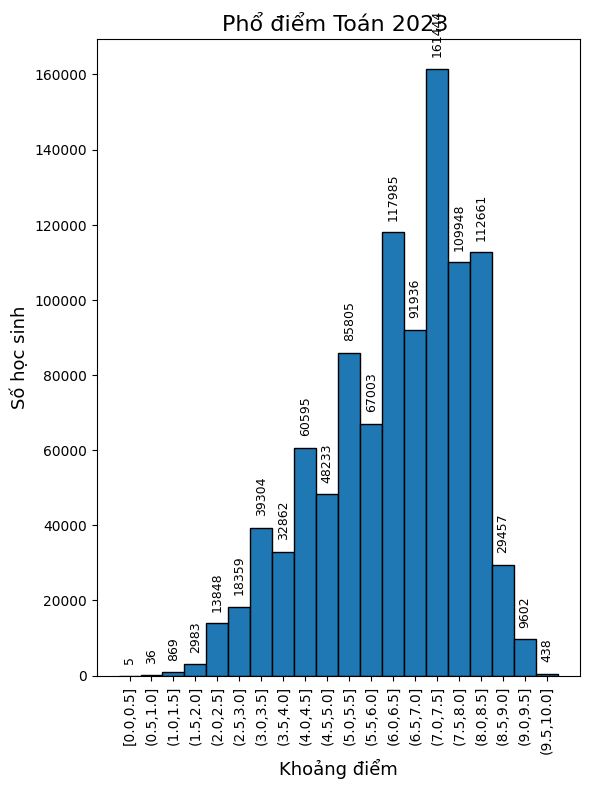

In [89]:
# 1. Mở rộng dữ liệu thô từ Series (index = điểm, values = số lượng)
points = np.repeat(Toan_23.index.values, Toan_23.values.astype(int))

# 2. Tạo edges để có khoảng: [0,0.5], (0.5,1], ..., (9.5,10]
# hist sẽ hiểu là [a,b) trừ bin cuối, nên mình dịch bin đầu hơi âm
edges = np.concatenate((
    np.array([-1e-6, 0.5]),   # ~ [0,0.5]
    np.arange(1, 10.5, 0.5)   # 1, 1.5, 2, ..., 10
))

# 3. Tạo edges để HIỂN THỊ (không để -1e-6 trong label)
display_edges = edges.copy()
display_edges[0] = 0.0   # hiển thị từ 0

# 4. Tạo label dạng [0,0.5], (0.5,1], ...
labels = []
labels.append(f"[{display_edges[0]},{display_edges[1]}]")   # bin đầu

for i in range(1, len(display_edges) - 1):
    labels.append(f"({display_edges[i]},{display_edges[i+1]}]")

# 5. Tính tần suất theo bins & vẽ BAR
plt.figure(figsize=(6, 8))

# Thay vì plt.hist → dùng np.histogram để tự vẽ bar
n, bin_edges = np.histogram(points, bins=edges)

# Tâm mỗi bin để đặt cột
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
widths = np.diff(bin_edges)

plt.bar(centers, n, width=widths, edgecolor="black")

plt.title("Phổ điểm Toán 2023 ", fontsize=16)
plt.xlabel("Khoảng điểm", fontsize=13)
plt.ylabel("Số học sinh", fontsize=13)

# 6. Set tick theo tâm mỗi bin + label dạng [ ], ( ]
plt.xticks(centers, labels, rotation=90)

# 7. Ghi số lượng lên từng cột (xoay 90°, value nguyên)
for x, count in zip(centers, n):
    if count == 0:
        continue
    y = count
    plt.text(
        x,
        y + max(n) * 0.02,
        str(int(count)),
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.tight_layout()
plt.show()


In [ ]:

print(Toan_24)


diem
0.0        1.0
0.4        1.0
0.6        5.0
0.8       12.0
1.0       43.0
1.2      126.0
1.4      278.0
1.6      619.0
1.8     1156.0
2.0     1975.0
2.2     2935.0
2.4     4279.0
2.6     5681.0
2.8     7304.0
3.0     8593.0
3.2    10076.0
3.4    11770.0
3.6    13026.0
3.8    14851.0
4.0    16457.0
4.2    17680.0
4.4    19896.0
4.6    21858.0
4.8    24293.0
5.0    26556.0
5.2    28625.0
5.4    31311.0
5.6    34540.0
5.8    37438.0
6.0    40255.0
6.2    43553.0
6.4    46501.0
6.6    49309.0
6.8    51589.0
7.0    53000.0
7.2    54349.0
7.4    55273.0
7.6    56017.0
7.8    55990.0
8.0    54182.0
8.2    48784.0
8.4    39796.0
8.6    27884.0
8.8    16048.0
9.0     7573.0
9.2     2899.0
9.4      962.0
9.6      221.0
9.8       43.0
Name: 2024, dtype: float64


In [63]:
print(Toan_25)


diem
0.00        7.0
0.10        1.0
0.35        2.0
0.40        4.0
0.45       10.0
          ...  
9.40       16.0
9.50     2517.0
9.60        3.0
9.75       40.0
10.00     513.0
Name: 2025, Length: 147, dtype: float64


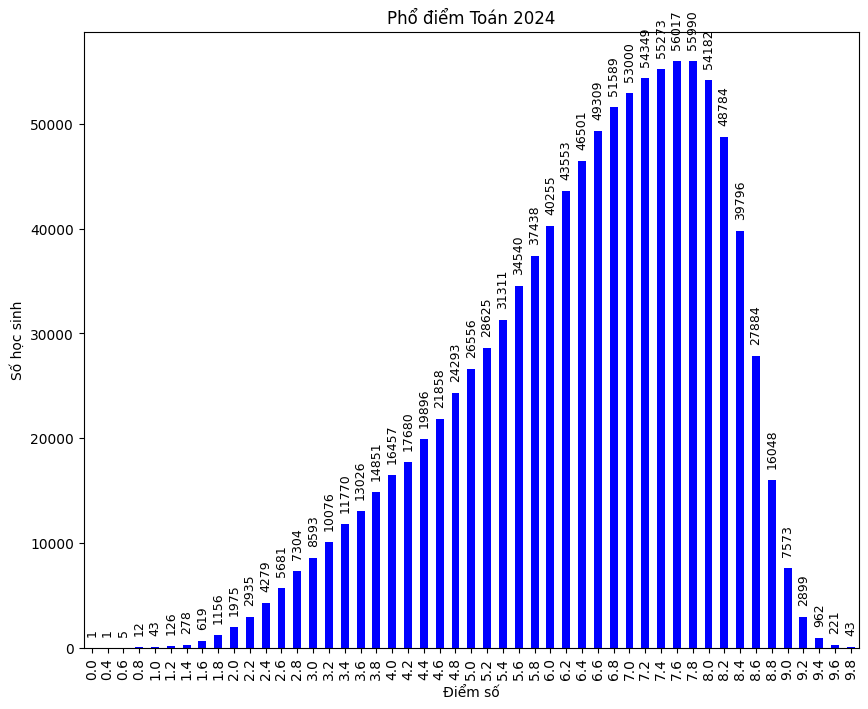

In [47]:
# Vẽ biểu đồ cột cho Toán 2024
plt.figure(figsize=(10, 8))
Toan_24.plot(kind="bar", color="blue", title="Phổ điểm Toán 2024")
plt.xlabel("Điểm số")
plt.ylabel("Số học sinh")
plt.xticks(rotation=90)

for i, v in enumerate(Toan_24.values):
    plt.text(
        i,
        v + max(Toan_24.values) * 0.02,
        str(int(v)),
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90     # <-- xoay chữ 90 độ
    )


plt.show()

# Theo Tổ Hợp

In [27]:
# Xử lý data theo tổ hợp khối

# Theo Năm 

In [28]:
# Xử lý data qua từng năm